<a href="https://colab.research.google.com/github/benjarojas/ADA-Informes/blob/main/BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Ordenamiento
**Entrada**: Conjunto de n elementos $[ a_1, a_2, \ldots, a_n ]$

**Salida**: Permutación de los elementos de entrada $ [ a_1', a_2', \ldots, a_n' ] $ de forma que $ a_1' \leq a_2' \leq \ldots \leq a_n' $

El **ordenamiento** es un problema estudiado desde los inicios de las ciencias de la computación puesto que a pesar de existir muchos algoritmos que lo resuelvan, cada uno de estos presenta ventajas y desventajas según sea el caso donde se aplique. En este informe se estudiará el algoritmo ***BucketSort***, que a diferencia de los algoritmos estudiados anteriormente, tiene la cualidad de tener un tiempo de ejecución **lineal** $O(n)$ en su caso promedio.

# 2. Código

A continuación se enseña el algoritmo **BucketSort** implementado en **Python**, incluyendo el algoritmo de ordenamiento que necesita para ordenar cada **bucket** respectivo.

## 2.1 InsertionSort

Luego de dividir el arreglo inicial en ***buckets***, utilizamos **Insertion Sort** para ordenar cada **bucket individualmente**.

In [5]:
def insertion_sort(A):
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        while j >= 0:
            if key < A[j]:
                A[j + 1] = A[j]
                j -= 1
            else:
                break
        A[j + 1] = key
    return A

## 2.2 BucketSort

In [16]:
from termcolor import colored

def bucket_sort(A, verbose=False):
    if(verbose): print(f"Arreglo de entrada: {colored(str(A), 'red')}\n")
    buckets = []
    bucket_count = 10

    for i in range(bucket_count):
        buckets.append([])
    if(verbose): print(f"Creamos el arreglo {colored('buckets', 'red')}: {colored(str(buckets), 'red')}\n")

    for j in A:
        bucket_index = int(bucket_count*j)
        if(verbose): print(f"Tomamos el elemento: {colored(str(j), 'green')}")
        if(verbose): print(f"Multiplicamos {colored(str(j), 'green')} por 10 y aproximamos: {colored(str(bucket_index), 'green')}")
        buckets[bucket_index].append(j)
        if(verbose): print(f"Agregamos {colored(str(j), 'green')} al bucket {colored(str(bucket_index), 'red')}: {colored(str(buckets[bucket_index]), 'red')}\n")
    
    for i in range(bucket_count):
        if(verbose): print(f"Ordenamos el bucket {colored(str(i), 'red')}: {colored(str(buckets[i]), 'red')}")
        buckets[i] = insertion_sort(buckets[i])
        if(verbose): print(f"Bucket {colored(str(i), 'red')} ordenado: {colored(str(buckets[i]), 'blue')}\n")
    
    if(verbose): print(f"Finalmente, insertamos cada elemento en su posición respectiva\n")
    k = 0
    for i in range(bucket_count):
        for j in range(len(buckets[i])):
            if(verbose): print(f"El elemento {colored(str(buckets[i][j]), 'green')} va en la posición {colored(str(k), 'red')} del arreglo de entrada")
            A[k] = buckets[i][j]
            if(verbose): print(f"Arreglo de salida: {colored(str(A[:k+1]), 'blue')}\n")
            k += 1
    return A

# 3. Descripción del algoritmo

El algoritmo **BucketSort** es un algoritmo de ordenamiento que tiene la cualidad de tener complejidad **lineal** para su caso promedio, y este es muy útil a la hora de ordenar entradas **uniformemente distribuidas**. Realiza las siguientes operaciones para números de punto flotante en el rango $[0, 1]$:


1.   Creamos un arreglo de arreglos de tamaño $10$, donde cada arreglo será llamado **bucket** y tendrá asociado un rango.
2.   Se tomará cada elemento del arreglo de entrada, se multiplicará por $10$ y se le aplicará la función **floor o parte entera**, es decir, se descartarán los decimales y el número resultante será utilizado como índice.
3.   Una vez calculado el índice, es en ese **bucket** donde insertaremos el elemento, y repetiremos eso para todos los elementos de entrada.
4.   Ahora, utilizamos el algoritmo **Insertion Sort** para ordenar cada **bucket**.
5.   Finalmente, tomamos cada **bucket** y agregamos cada uno de sus elementos al arreglo de salida, quedando ordenado.


## 3.1 Ejemplo de ejecución

Tomaremos como ejemplo el siguiente arreglo de entrada:

![picture](https://i.imgur.com/cHlNQe4.png)

Ahora, el algoritmo creará un arreglo de arreglos llamados **buckets**. Cada **bucket** tendrá asociado un rango:

![picture](https://i.imgur.com/8bFsgrc.png)

El algoritmo recorrerá el arreglo de entrada y tomará cada elemento, lo multiplicara por 10 y le aplicará la operación **floor/parte entera**, obteniendo así su **bucket** respectivo:

![picture](https://i.imgur.com/CoPkIbE.png)

Una vez insertado cada elemento en su respectivo **bucket**, el arreglo **buckets** se verá así:

![picture](https://i.imgur.com/G4oCIgd.png)

Luego, aplicaremos **InsertionSort** a cada **bucket** individualmente para ordenarlos, en este caso solamente se verá afectado el **bucket 6** (`buckets[5]`):

![picture](https://i.imgur.com/y911xn8.png)

Finalmente, se tomará cada **bucket** y se insertarán en el arreglo de salida quedando ordenado:

![picture](https://i.imgur.com/UZGQsDW.png)

## 3.2 Ejecución paso a paso (`verbose = True`)

In [119]:
import random
A = [random.uniform(0,1) for x in range(5)] # Arreglo aleatorio de elementos entre 0 y 1
A = bucket_sort(A, verbose=True) # Ordenamos con verbose=True

Arreglo de entrada: [0.3232294846377327, 0.3435320216233735, 0.8739503052374353, 0.6526424481333726, 0.026631045841448486]

Creamos el arreglo buckets: [[], [], [], [], [], [], [], [], [], []]

Tomamos el elemento: 0.3232294846377327
Multiplicamos 0.3232294846377327 por 10 y aproximamos: 3
Agregamos 0.3232294846377327 al bucket 3: [0.3232294846377327]

Tomamos el elemento: 0.3435320216233735
Multiplicamos 0.3435320216233735 por 10 y aproximamos: 3
Agregamos 0.3435320216233735 al bucket 3: [0.3232294846377327, 0.3435320216233735]

Tomamos el elemento: 0.8739503052374353
Multiplicamos 0.8739503052374353 por 10 y aproximamos: 8
Agregamos 0.8739503052374353 al bucket 8: [0.8739503052374353]

Tomamos el elemento: 0.6526424481333726
Multiplicamos 0.6526424481333726 por 10 y aproximamos: 6
Agregamos 0.6526424481333726 al bucket 6: [0.6526424481333726]

Tomamos el elemento: 0.026631045841448486
Multiplicamos 0.026631045841448486 por 10 y aproximamos: 0
Agregamos 0.026631045841448486 al bucket 

# 4. Propiedades del algoritmo

## 4.1 Análisis del tiempo de ejecución

Al analizar el código del algoritmo, es fácil darse cuenta que en el peor caso cada operación que realiza el algoritmo tiene complejidad $O(n)$ a excepción de la sección donde ordenamos cada ***Bucket*** que depende de otro algoritmo, por lo que debemos analizar el tiempo de ejecución de las $n$ llamadas al algoritmo **Insertion Sort**.

Sea $n_i$ una variable aleatoria que corresponderá a la cantidad de elementos ubicada en `buckets[i]`. El caso promedio de **InsertionSort** tiene complejidad $O(n^2)$, por lo que podemos definir el tiempo de ejecución del algoritmo como la función:

$T(n) = \Theta(n) + \sum_{i=0}^{n-1} O(n_i^2)$

Ya que queremos calcular el tiempo de ejecución y $n_i$ es una *variable aleatoria*, podemos utilizar el ***valor esperado***, por lo que lo aplicamos a ambos lados de la ecuación y lo expresamos directamente dentro de nuestra sumatoria pues es un ***operador lineal***:

$E[T(n)] = \Theta(n) + \sum_{i=0}^{n-1} O(E[n_i^2])$

Definamos una variable aleatoria $X_{ij}$ que tomará el valor $1$ si el elemento $A[j]$ cae aleatoriamente dentro de `bucket[i]`, por lo que podemos definir el valor de nuestra variable aleatoria $n_i$ como una sumatoria:

$n_i = \sum_{j=1}^{n} X_{ij}$

Por lo que reemplazando y desarrollando en nuestra ecuación anterior obtenemos:

$E[n_i^2] = E[ \sum_{j=1}^{n} X_{ij} \sum_{k=1}^{n} X_{ik} ]$

$ \ \ \quad \quad = E[ \sum_{j=1}^{n} \sum_{k=1}^{n} X_{ij} X_{ik} ]$

$ \ \ \quad \quad = E[ \sum_{j=1}^{n} X_{ij}^2] + E[ \sum_{1 \leq j, k \leq n} \sum_{j \neq k} X_{ij} X_{ik}]$

Ahora, evaluamos las sumatorias de forma separada.

Ya que tenemos $n$ `buckets`, la probabilidad de que un objeto caiga en el `bucket[i]` es de $1/n$.

La variable aleatoria $X_{ij}$ tendrá valor $1$ con la probabilidad $1/n$ y en caso contrario valor $0$, por esta razón:

$E[X_{ij}^2] = 1^2 \cdot \frac{1}{n} + 0^2 \cdot (1 - \frac{1}{n}) = \frac{1}{n}$

Cuando $j \neq k$, las variables aleatorias $X_{ij} X_{ik}$ serán independientes por lo que:

$E[X_{ij} X_{ik}] = E[X_{ij}] \cdot E[X_{ik}]$

$\qquad \ \\ \qquad = \frac{1}{n} \cdot \frac{1}{n}$

$\qquad \ \\ \qquad = \frac{1}{n^2}$

Reemplazando en nuestra ecuación anterior obtenemos que:

$E[n_i^2] = 2 - \frac{1}{n}$

Y reemplazando el resultado del *valor esperado* en nuestra función, podemos obtener nuestro tiempo de ejecución para ***Bucket Sort***:

$T(n) = \Theta(n) + n \cdot O(2-1/n) = \Theta(n). \blacksquare$

## 4.2 Correctitud del algoritmo
Ya que este algoritmo utiliza **Insertion Sort** en uno de sus pasos, debemos también probar su correctitud.

### 4.2.1 Correctitud de **InsertionSort**
#### **Teorema**
_El algoritmo Insertion Sort genera un arreglo_ $[a_1',a_2', \ldots ,a_n']$ _mediante permutaciones de los mismos elementos de entrada, de tal forma que_ $a_1' \leq a_2' \leq \ldots \leq a_n'$

#### **Prueba del Teorema**
Anteriormente se mostró que por cada iteración $i$, el elemento $a_i$ es comparado con los primeros $i-1$ elementos del arreglo, y en caso de encontrarse un elemento $a_j$ menor, los elementos $[a_{j} \ldots a_{i-1}]$ serán desplazados una posición a la derecha, y el elemento $a_i$ será insertado donde se encontraba previamente $a_j$.

A partir de esto, probaremos la siguiente **propiedad invariante de bucle** para el algoritmo **Insertion Sort**:

> *Al comienzo de cada iteración, los primeros $i-1$ elementos que corresponden a permutaciones de los elementos del arreglo original se encuentran ordenados de menor a mayor*.

##### **Inicialización**
Al comienzo de la primera iteración $(i = 1)$, el primer $i - 1 = 0$ elemento del arreglo cumple con el teorema. Esto es trivialmente cierto, puesto que por definición un único elemento siempre está ordenado.

##### **Mantención**
Mediante inducción, podemos asumir que en cada iteración se cumple la **propiedad invariante de bucle**, es decir, el sub-arreglo $[ a_0 , \ldots , a_{i-1} ]$ está ordenado de tal forma que $a_0 \leq \ldots \leq a_{i-1}$

Por cada iteración, el sub-arreglo se expande, pero se mantiene ordenado, ya que cuando se inserta un elemento $\lambda$, se insertará luego del primer elemento $\leq \lambda$ y antes del primer elemento $\geq \lambda$, manteniendo el orden de menor a mayor y cumpliendose la propiedad.

##### **Correctitud**

Ya que se demostró que la propiedad de bucle invariante se cumple al inicio del bucle y se mantiene en cada iteración, podemos decir que al **finalizar la $n$-ésima iteración del algoritmo Insertion Sort**, se genera un arreglo $[a_1',a_2',...,a_n']$, con los elementos iniciales del arreglo de entrada ordenados de menor a mayor. $\blacksquare$



### 4.2.2 Correctitud de **BucketSort**

#### **Hipótesis**
> *Nuestra hipótesis $P(n)$ es que el algoritmo **BucketSort** toma un arreglo de entrada con elementos en el invervalo $[0, 1]$ y los re-ordena de forma que el arreglo queda ordenado de menor a mayor*

#### **Prueba de la hipótesis**

**Caso base**: Cuando el arreglo de entrada tiene un único elemento, este caerá en algun **bucket** y será ordenado por **Insertion Sort**, por lo que $P(1)$ es correcto.

**Paso inductivo**: Cuando $n > 1$, asumiremos que **BucketSort** separa correctamente $n$ elementos entre los $10$ **buckets**.

Supongamos que tenemos un arreglo de entrada de tamaño $10n$, y que **BucketSort** separa en 10 **buckets** de tamaño $10n/10$, es decir, $n$.

Una vez separados los elementos, **Insertion Sort** ordenará cada **bucket** individualmente y luego se unirá cada **bucket** en el arreglo de salida.

Como asumimos que $P(n)$ es correcto y sabemos que **Insertion Sort** es correcto, queda demostrado que **BucketSort es correcto.** $\blacksquare$



# 5. Experimentos

## 5.1 Comparación de **BucketSort** vs **RadixSort**

Se comparará el tiempo de ejecución de los algoritmos para arreglos aleatorios.

### 5.1.1 Código de **RadixSort**

In [60]:
def counting_sort(arr, exp1):
	n = len(arr)
	output = [0] * (n)
	count = [0] * (10)
	for i in range(0, n):
		index = arr[i] // exp1
		count[index % 10] += 1
	for i in range(1, 10):
		count[i] += count[i - 1]
	i = n - 1
	while i >= 0:
		index = arr[i] // exp1
		output[count[index % 10] - 1] = arr[i]
		count[index % 10] -= 1
		i -= 1
	i = 0
	for i in range(0, len(arr)):
		arr[i] = output[i]
def radix_sort(arr):
	max1 = max(arr)
	exp = 1
	while max1 / exp >= 1:
		counting_sort(arr, exp)
		exp *= 10

### 5.1.2 Procedimiento

Se crearán **arreglos aleatorios** con números decimales en el intervalo $[0, 1]$ y tamaño de problema $n \in [5, 500]$ y se medirá el tiempo de ejecución para los 2 algoritmos.

Cabe mencionar que luego de generarlos, se toma una copia de cada arreglo aleatorio y se transforma en números enteros ya que nuestra implementación de **RadixSort** no funciona con decimales.

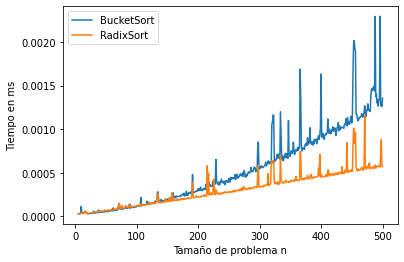

In [73]:
import random
import matplotlib.pyplot as plt
import datetime
import timeit

x, y1, y2 = [], [], []

for n in range(5,501):

  # creamos arreglo aleatorio de tamaño n
  A = [random.uniform(0, 1) for x in range(n)]
  # convertimos los decimales a enteros para que radixsort pueda funcionar
  B = [int(x*100) for x in A]

  bucket_time = timeit.repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({A})", repeat=1, number=1)
  radix_time = timeit.repeat(setup="from __main__ import radixSort", stmt=f"radixSort({B})", repeat=1, number=1)
  
  x.append(n)
  y1.append(bucket_time)
  y2.append(radix_time)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["BucketSort", "RadixSort"])
plt.xlabel('Tamaño de problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### 5.1.3 Análisis de resultados

Como se puede observar en el gráfico, a pesar de que ambos algoritmos tengan complejidad lineal para su caso promedio *($O(n)$ para **BucketSort** y $O(nk)$ para **RadixSort**)*, **BucketSort** muestra un peor rendimiento para casos aleatorios, esto creemos que se debe a que este algoritmo funciona especialmente mejor en casos donde sabemos que la distribución de los elementos de entrada es **uniforme**, por lo que su rendimiento se parece mucho mas al **peor caso** cuando esta es aleatoria. También debemos considerar que **RadixSort** posee la misma complejidad $O(nk)$ para su peor caso, cosa que podemos apreciar en el gráfico dado su crecimiento **lineal**.

En el gráfico se pueden observar ciertos **peaks**, tenemos 2 teorías para explicarlos, la primera es que estos ocurren cuando los elementos de entrada del caso aleatorio están dispuestos de la forma del peor caso de **BucketSort**, y la segunda es que se deban al comportamiento impredecible del procesador. 

## 5.2 Comparación de **BucketSort** y **RadixSort** para arreglos uniformemente distribuidos

#### 5.2.1 Procedimiento

Se generarán arreglos aleatorios de decimales **ordenados** en el intervalo $[0, 1]$ de tamaño $n \in [10, 400]$, donde los últimos 10 elementos del arreglo serán **invertidos**.

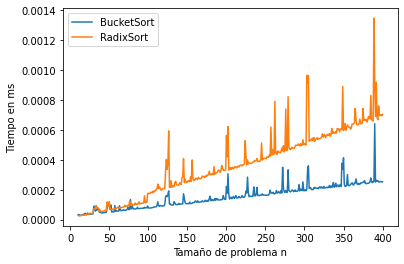

In [118]:
import random
import matplotlib.pyplot as plt
import datetime
import timeit

x, y1, y2 = [], [], []

for n in range(10,401):

  # creamos arreglo aleatorio de decimales ordenados
  A = [j/500 for j in range(1,n+2)]
  # invertimos los últimos 10 números
  A = A[0:len(A)-10] + A[len(A)-1:len(A)-11:-1]

  # pasamos los arreglos a enteros para ordenarlos con radixsort
  B = [int(x*500) for x in A]

  bucket_time = timeit.repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({A})", repeat=1, number=1)
  radix_time = timeit.repeat(setup="from __main__ import radixSort", stmt=f"radixSort({B})", repeat=1, number=1)
  
  x.append(n)
  y1.append(bucket_time)
  y2.append(radix_time)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["BucketSort", "RadixSort"])
plt.xlabel('Tamaño de problema n')
plt.ylabel('Tiempo en ms')
plt.show()

#### 5.2.2 Análisis de resultados

En el primer experimento pudimos apreciar el mal rendimiento de **BucketSort** para arreglos aleatorios, por lo que decidimos compararlo con **RadixSort** pero esta vez con arreglos donde su distribución es muy uniforme, ya que tomamos un arreglo de tamaño $n$ ordenado e invertimos sus últimos $10$ elementos.

Como podemos observar en la gráfica, **BucketSort** termina siendo más eficiente que **RadixSort**, ya que su complejidad para este tipo de casos resulta $O(n)$.